In [1]:
import numpy as np 
from scipy.stats import pearsonr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

Входные данные: n объектов, каждый из которых характеризуется
двумя числовыми признаками:
Требуется исследовать степень взаимосвязи между двумя
признаками некоторых объектов. Для каждого набора данных
необходимо выполнить следующие задания.
1. Визуализировать данные на плоскости в виде точек
2. Статистически оценить коэффициент корреляции Пирсона
между признаками x и y.
3. Проверить статистическую гипотезу о некоррелированности
признаков x и y на уровне значимости 0,05.
Все описанные выше задания требуется выполнить для двух
наборов данных.
1. Смоделированные независимые случайные вектора
имеющие гауссовское распределение с заданным математическим
ожиданием a и корреляционной матрицей R.
2. Реальные статистические данные из заданного набора
(выдаются преподавателем).
Отчёт кроме прочих обязательных элементов должен включать:
1) изображения данных в виде точек на плоскости;
2) статистические оценки коэффициентов корреляции Пирсона для
каждого набора данных, сравнение статистической оценки
коэффициента корреляции Пирсона с реальным коэффициентом
корреляции Пирсона для смоделированных данных;

In [2]:
n = 10000
a = np.array([-1, 1])
r = np.array([[10, 3], [3, 1]])
n, a, r

(10000,
 array([-1,  1]),
 array([[10,  3],
        [ 3,  1]]))

In [3]:
gendata = np.random.multivariate_normal(mean=a, cov=r, size=n)
gendata

array([[-3.11650673,  0.54799798],
       [-0.34680104,  0.53233211],
       [-2.08737614,  0.58309243],
       ...,
       [ 1.62739304,  1.54020684],
       [-3.91984214,  0.06593816],
       [-1.21785776,  0.03938692]])

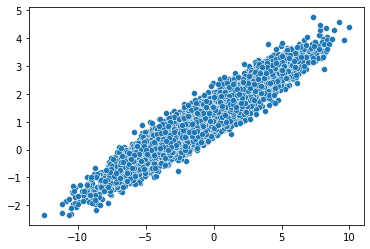

In [4]:
g = sns.scatterplot(x=gendata[:,0], y=gendata[:,1])
plt.savefig('multinoraml-dist-scatterplot.png',dpi=500)

In [5]:
corrpearson, p = pearsonr(x=gendata[:,0],y=gendata[:,1])
print(f'corr coeff: {corrpearson}\
\nreal correlation: {r[0, 1] / np.sqrt(r[0, 0] * r[1, 1])}\
\ndiff: {corrpearson - r[0, 1] / np.sqrt(r[0, 0] * r[1, 1])}\
np-value: {p}')


corr coeff: 0.9485236062156681
real correlation: 0.9486832980505138
diff: -0.0001596918348456544np-value: 0.0


In [6]:
ttest_ind(gendata[:,0],gendata[:,1])

Ttest_indResult(statistic=-60.80727585055261, pvalue=0.0)

In [7]:
abalone = pd.read_csv('data/abalone.data')
abalone.head(25).to_excel('sample.xlsx', index=False)

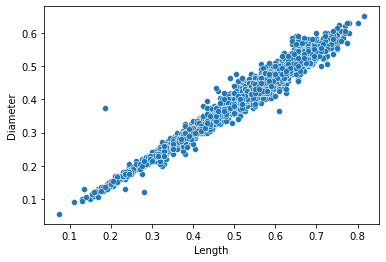

In [8]:
g = sns.scatterplot(data=abalone, x='Length', y='Diameter')
plt.savefig('abalone-scatterplot.png',dpi=500)

In [9]:
corrpearsonabalone, p = pearsonr(x=abalone['Length'].values,y=abalone['Diameter'].values)
print(f'corr coeff: {corrpearsonabalone}\np-value: {p}')

corr coeff: 0.9868115846024931
p-value: 0.0


In [10]:
ttest_ind(abalone['Length'].values, abalone['Diameter'].values)

Ttest_indResult(statistic=48.16842575921785, pvalue=0.0)